# Investigating Netflix Movies and Guest Stars in The Office
A Netflix é um dos principais serviços de streaming de todo mundo, e sabemos que há um enorme acervo disponível em sua plataforma, além dos vários filmes e séries que já passaram por lá e foram retirados de seu catálogo, já que a Netflix trabalha nesse ramo desde 1997. 

Mediante desse grande acervo, é de se imaginar que existam muitos dados sobre os mesmos, o que pode nos trazer vários insights, além de nos permitir responder diversas perguntas.

Diante desse fato, queremos refutar (ou não), as seguintes hipóteses:
1. A duração dos filmes vem diminuindo com o passar dos anos?
2. Se sim, isso vale para todos os gêneros?

Usando ferramentas como pandas para a manipulação de dados e matplotlib para a visualização, vamos tentar responder essas, e eventuais perguntas que surgirem. Vamos lá!


In [14]:
#Importando bibliotecas necessárias para a realização do projeto
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Ler o CSV e guardá-lo em um daaframe (adquirido no Kaggle)
netflix_df = pd.read_csv("netflix_titles.csv")

# Visualizar as primeiras linhas do dataframe
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Aplicando filtros
Temos o nosso dataframe, porém na segunda coluna "type", observamos que além de filmes, também temos Shows de TV, que não são necessários para responder nossas perguntas, portante vamos retirálos. Além disso, existem muitas colunas que não são necessárias para a nossa análise, então vamos retirá-las também.

In [20]:
# Retirando as linhas que não são referente à filmes
netflix_df_movies = netflix_df[netflix_df['type'] == 'Movie']
netflix_df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [32]:
# Selecionando as colunas de interesse
netflix_df_movies_col_subset = netflix_df_movies[['title', "country", "listed_in", "release_year",  "duration"]]
netflix_df_movies_col_subset.head()

,title,country,listed_in,release_year,duration
0,Dick Johnson Is Dead,United States,Documentaries,2020,90 min
6,My Little Pony: A New Generation,NaN,Children & Family Movies,2021,91 min
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","Dramas, Independent Movies, International Movies",1993,125 min
9,The Starling,United States,"Comedies, Dramas",2021,104 min
12,Je Suis Karl,"Germany, Czech Republic","Dramas, International Movies",2021,127 min


# Limpando os dados
Não há muitos dados a serem limpados, porém, a coluna "duration" apresenta sempre a string "min" ao final da linha, o que é algo que não nos ajudará a realizar as análises, portanto, vamos retirar. 

In [38]:
netflix_df_movies_col_subset['duration'] = netflix_df_movies_col_subset['duration'].str.replace('min','').astype(int)
netflix_df_movies_col_subset.head()

ValueError: cannot convert float NaN to integer

## Visualizando os dados
Agora que já manipulamos nosso dataframe da forma como queríamos, tentar visualizar os dados em um gráfico de dispersão, o qual vamos relacionar a coluna "release_year" com a "duration", e já tentar responder nossa primeira pergunta: "A duração dos filmes diminuir com o passar dos anos?".

TypeError: 'value' must be an instance of str or bytes, not a float

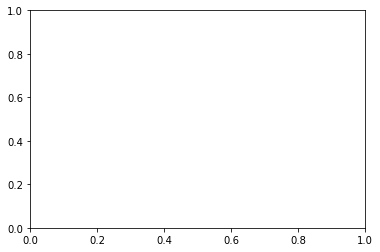

In [36]:
# Criando o gráfico de dispersão
plt.scatter("release_year","duration", data = netflix_df_movies_col_subset)